In [8]:
#@title Exercise 1: Setting Up the Environment

#@markdown ## 1. Install Libraries
#@markdown This step installs the required libraries for building and working with Bayesian Networks.
#@markdown The `pgmpy` library is essential for Bayesian modeling, while `pandas`, `networkx`, and `matplotlib` are used for data manipulation, network visualization, and plotting, respectively.

#@markdown ```
#@markdown !pip install pgmpy
#@markdown ```

#@markdown ## 2. Import Libraries
#@markdown We import the necessary libraries to enable functionality for Bayesian Networks, data handling, and visualization.

#@markdown ```python
#@markdown import numpy as np
#@markdown import pandas as pd
#@markdown from pgmpy.models import BayesianNetwork
#@markdown from pgmpy.factors.discrete import TabularCPD
#@markdown from pgmpy.inference import VariableElimination
#@markdown from pgmpy.estimators import MaximumLikelihoodEstimator
#@markdown import networkx as nx
#@markdown import matplotlib.pyplot as plt
#@markdown ```

!pip install pgmpy
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
clear_output()

import pkg_resources
installed_packages = pkg_resources.working_set
package_names = [i.key for i in installed_packages]
if 'pgmpy' in package_names:
    print("pgmpy installed successfully!")
else:
    print("Error: pgmpy not installed. Please try again.")

print("Libraries imported successfully!")

#@markdown ### Confirmation Message
#@markdown After importing the libraries, we print a message to confirm that the setup was successful.

#@markdown ```python
#@markdown print("Libraries imported successfully!")
#@markdown ```

#@markdown ### Explanation:
#@markdown In this exercise, we set up our environment by installing the necessary libraries and importing them.
#@markdown The `pgmpy` library is crucial for working with Bayesian Networks.
#@markdown We also import `pandas` for data handling, `networkx` for visualization, and `matplotlib` for plotting graphs.



Error: pgmpy not installed. Please try again.
Libraries imported successfully!


In [9]:
#@title Exercise 2: Define the Bayesian Network Structure

#@markdown ## 1. Define the Variables and Relationships
#@markdown In this section, we define the structure of our Bayesian Network for heart disease diagnosis.
#@markdown The network consists of several variables that represent risk factors, the condition being diagnosed,
#@markdown and the symptoms/results observed.

#@markdown ```python
#@markdown # Define the Bayesian Network structure
#@markdown model = BayesianNetwork([
#@markdown     ('Age', 'Heart Disease'),        # Age influences the likelihood of heart disease
#@markdown     ('Smoking', 'Heart Disease'),    # Smoking increases the risk of heart disease
#@markdown     ('Exercise', 'Heart Disease'),   # Lack of exercise contributes to heart disease risk
#@markdown     ('Cholesterol', 'Heart Disease'), # High cholesterol levels are a risk factor for heart disease
#@markdown     ('Blood Pressure', 'Heart Disease'), # High blood pressure is also a significant risk factor
#@markdown     ('Heart Disease', 'Chest Pain'), # Presence of heart disease can cause chest pain
#@markdown     ('Heart Disease', 'ECG Result')   # Heart disease affects the results of ECG tests
#@markdown ])
#@markdown
#@markdown print("Bayesian Network structure defined successfully!")
#@markdown ```

# Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'Heart Disease'),        # Age influences the likelihood of heart disease
    ('Smoking', 'Heart Disease'),    # Smoking increases the risk of heart disease
    ('Exercise', 'Heart Disease'),   # Lack of exercise contributes to heart disease risk
    ('Cholesterol', 'Heart Disease'), # High cholesterol levels are a risk factor for heart disease
    ('Blood Pressure', 'Heart Disease'), # High blood pressure is also a significant risk factor
    ('Heart Disease', 'Chest Pain'), # Presence of heart disease can cause chest pain
    ('Heart Disease', 'ECG Result')   # Heart disease affects the results of ECG tests
])

print("Bayesian Network structure defined successfully!")

#@markdown ### Explanation:
#@markdown In this exercise, we define the structure of our Bayesian Network for heart disease diagnosis.
#@markdown The network includes the following variables:
#@markdown - **Age, Smoking, Exercise, Cholesterol, Blood Pressure**: These are the risk factors that may contribute to heart disease.
#@markdown - **Heart Disease**: The condition we are diagnosing based on the risk factors.
#@markdown - **Chest Pain, ECG Result**: These are the symptoms and diagnostic results influenced by the presence of heart disease.
#@markdown
#@markdown The relationships are modeled as directed edges in the network, representing the causal influences between the variables.



Bayesian Network structure defined successfully!


In [10]:
#@title Exercise 3: Define Conditional Probability Tables (CPTs)

#@markdown ###Define CPTs for each variable
#@markdown  Each TabularCPD object represents the conditional probability distribution of a variable given its parents

#@markdown ```python
#@markdown # Age distribution (no parents)
#@markdown cpd_age = TabularCPD(variable='Age', variable_card=3,
#@markdown                      values=[[0.3], [0.5], [0.2]],  # Probabilities for Young, Middle-aged, Old
#@markdown                      state_names={'Age': ['Young', 'Middle-aged', 'Old']})
#@markdown
#@markdown # Smoking status distribution (no parents)
#@markdown cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
#@markdown                          values=[[0.7], [0.3]],  # Probabilities for No and Yes
#@markdown                          state_names={'Smoking': ['No', 'Yes']})
#@markdown
#@markdown # Exercise status distribution (no parents)
#@markdown cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
#@markdown                           values=[[0.6], [0.4]],  # Probabilities for Regular and None
#@markdown                           state_names={'Exercise': ['Regular', 'None']})
#@markdown
#@markdown # Cholesterol levels distribution (no parents)
#@markdown cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
#@markdown                              values=[[0.7], [0.3]],  # Probabilities for Normal and High
#@markdown                              state_names={'Cholesterol': ['Normal', 'High']})
#@markdown
#@markdown # Blood Pressure distribution (no parents)
#@markdown cpd_bp = TabularCPD(variable='Blood Pressure', variable_card=2,
#@markdown                     values=[[0.8], [0.2]],  # Probabilities for Normal and High
#@markdown                     state_names={'Blood Pressure': ['Normal', 'High']})
#@markdown
#@markdown # Conditional Probability Table for Heart Disease, depending on multiple risk factors
#@markdown cpd_heart_disease = TabularCPD(
#@markdown     variable='Heart Disease', variable_card=2,
#@markdown     values=[
#@markdown         # Probability of Heart Disease = No given combinations of parents
#@markdown         [0.95, 0.9, 0.7, 0.5, 0.85, 0.7, 0.5, 0.3, 0.8, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1,
#@markdown          0.9, 0.8, 0.6, 0.4, 0.75, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1, 0.6, 0.4, 0.2, 0.05,
#@markdown          0.85, 0.75, 0.55, 0.35, 0.7, 0.55, 0.35, 0.2, 0.65, 0.45, 0.25, 0.1, 0.5, 0.3, 0.15, 0.05],
#@markdown         # Probability of Heart Disease = Yes given combinations of parents
#@markdown         [0.05, 0.1, 0.3, 0.5, 0.15, 0.3, 0.5, 0.7, 0.2, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9,
#@markdown          0.1, 0.2, 0.4, 0.6, 0.25, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9, 0.4, 0.6, 0.8, 0.95,
#@markdown          0.15, 0.25, 0.45, 0.65, 0.3, 0.45, 0.65, 0.8, 0.35, 0.55, 0.75, 0.9, 0.5, 0.7, 0.85, 0.95]
#@markdown     ],
#@markdown     evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],  # Parent nodes
#@markdown     evidence_card=[3, 2, 2, 2, 2],  # Number of states for each parent
#@markdown     state_names={'Heart Disease': ['No', 'Yes'],
#@markdown                  'Age': ['Young', 'Middle-aged', 'Old'],
#@markdown                  'Smoking': ['No', 'Yes'],
#@markdown                  'Exercise': ['Regular', 'None'],
#@markdown                  'Cholesterol': ['Normal', 'High'],
#@markdown                  'Blood Pressure': ['Normal', 'High']}
#@markdown )
#@markdown
#@markdown # Conditional Probability Table for Chest Pain, depending on Heart Disease
#@markdown cpd_chest_pain = TabularCPD(
#@markdown     variable='Chest Pain', variable_card=2,
#@markdown     values=[[0.9, 0.3],  # Probability of Chest Pain = No given Heart Disease states
#@markdown             [0.1, 0.7]], # Probability of Chest Pain = Yes given Heart Disease states
#@markdown     evidence=['Heart Disease'],  # Parent node
#@markdown     evidence_card=[2],  # Number of states for Heart Disease
#@markdown     state_names={'Chest Pain': ['No', 'Yes'],
#@markdown                  'Heart Disease': ['No', 'Yes']}
#@markdown )
#@markdown
#@markdown # Conditional Probability Table for ECG Result, depending on Heart Disease
#@markdown cpd_ecg = TabularCPD(
#@markdown     variable='ECG Result', variable_card=2,
#@markdown     values=[[0.8, 0.2],  # Probability of ECG Result = Normal given Heart Disease states
#@markdown             [0.2, 0.8]], # Probability of ECG Result = Abnormal given Heart Disease states
#@markdown     evidence=['Heart Disease'],  # Parent node
#@markdown     evidence_card=[2],  # Number of states for Heart Disease
#@markdown     state_names={'ECG Result': ['Normal', 'Abnormal'],
#@markdown                  'Heart Disease': ['No', 'Yes']}
#@markdown )
#@markdown
#@markdown # Add CPDs to the model
#@markdown model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp,
#@markdown                cpd_heart_disease, cpd_chest_pain, cpd_ecg)
#@markdown
#@markdown # Check if the model is valid
#@markdown if model.check_model():
#@markdown     print("Model is valid and CPDs are correctly defined!")
#@markdown else:
#@markdown     print("Error: Model is not valid. Please check your CPDs.")
#@markdown ```

# Age distribution (no parents)
cpd_age = TabularCPD(variable='Age', variable_card=3,
                     values=[[0.3], [0.5], [0.2]],  # Probabilities for Young, Middle-aged, Old
                     state_names={'Age': ['Young', 'Middle-aged', 'Old']})

# Smoking status distribution (no parents)
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                         values=[[0.7], [0.3]],  # Probabilities for No and Yes
                         state_names={'Smoking': ['No', 'Yes']})

# Exercise status distribution (no parents)
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2,
                          values=[[0.6], [0.4]],  # Probabilities for Regular and None
                          state_names={'Exercise': ['Regular', 'None']})

# Cholesterol levels distribution (no parents)
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2,
                             values=[[0.7], [0.3]],  # Probabilities for Normal and High
                             state_names={'Cholesterol': ['Normal', 'High']})

# Blood Pressure distribution (no parents)
cpd_bp = TabularCPD(variable='Blood Pressure', variable_card=2,
                    values=[[0.8], [0.2]],  # Probabilities for Normal and High
                    state_names={'Blood Pressure': ['Normal', 'High']})

# Conditional Probability Table for Heart Disease, depending on multiple risk factors
cpd_heart_disease = TabularCPD(
    variable='Heart Disease', variable_card=2,
    values=[
        # Probability of Heart Disease = No given combinations of parents
        [0.95, 0.9, 0.7, 0.5, 0.85, 0.7, 0.5, 0.3, 0.8, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1,
         0.9, 0.8, 0.6, 0.4, 0.75, 0.6, 0.4, 0.2, 0.7, 0.5, 0.3, 0.1, 0.6, 0.4, 0.2, 0.05,
         0.85, 0.75, 0.55, 0.35, 0.7, 0.55, 0.35, 0.2, 0.65, 0.45, 0.25, 0.1, 0.5, 0.3, 0.15, 0.05],
        # Probability of Heart Disease = Yes given combinations of parents
        [0.05, 0.1, 0.3, 0.5, 0.15, 0.3, 0.5, 0.7, 0.2, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9,
         0.1, 0.2, 0.4, 0.6, 0.25, 0.4, 0.6, 0.8, 0.3, 0.5, 0.7, 0.9, 0.4, 0.6, 0.8, 0.95,
         0.15, 0.25, 0.45, 0.65, 0.3, 0.45, 0.65, 0.8, 0.35, 0.55, 0.75, 0.9, 0.5, 0.7, 0.85, 0.95]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],  # Parent nodes
    evidence_card=[3, 2, 2, 2, 2],  # Number of states for each parent
    state_names={'Heart Disease': ['No', 'Yes'],
                 'Age': ['Young', 'Middle-aged', 'Old'],
                 'Smoking': ['No', 'Yes'],
                 'Exercise': ['Regular', 'None'],
                 'Cholesterol': ['Normal', 'High'],
                 'Blood Pressure': ['Normal', 'High']}
)

# Conditional Probability Table for Chest Pain, depending on Heart Disease
cpd_chest_pain = TabularCPD(
    variable='Chest Pain', variable_card=2,
    values=[[0.9, 0.3],  # Probability of Chest Pain = No given Heart Disease states
            [0.1, 0.7]], # Probability of Chest Pain = Yes given Heart Disease states
    evidence=['Heart Disease'],  # Parent node
    evidence_card=[2],  # Number of states for Heart Disease
    state_names={'Chest Pain': ['No', 'Yes'],
                 'Heart Disease': ['No', 'Yes']}
)

# Conditional Probability Table for ECG Result, depending on Heart Disease
cpd_ecg = TabularCPD(
    variable='ECG Result', variable_card=2,
    values=[[0.8, 0.2],  # Probability of ECG Result = Normal given Heart Disease states
            [0.2, 0.8]], # Probability of ECG Result = Abnormal given Heart Disease states
    evidence=['Heart Disease'],  # Parent node
    evidence_card=[2],  # Number of states for Heart Disease
    state_names={'ECG Result': ['Normal', 'Abnormal'],
                 'Heart Disease': ['No', 'Yes']}
)

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp,
               cpd_heart_disease, cpd_chest_pain, cpd_ecg)

# Check if the model is valid
if model.check_model():
    print("Model is valid and CPDs are correctly defined!")
else:
    print("Error: Model is not valid. Please check your CPDs.")

#@markdown ### Explanation:
#@markdown In this exercise, we define the Conditional Probability Tables (CPTs) for each variable in our Bayesian Network.
#@markdown The CPTs represent the probabilistic relationships between variables. Here's a breakdown of the CPTs:
#@markdown
#@markdown 1. **Risk Factors**: Age, Smoking, Exercise, Cholesterol, and Blood Pressure have simple probability distributions.
#@markdown 2. **Heart Disease**: This CPT is more complex as it depends on all risk factors. The probabilities represent the likelihood of heart disease given different combinations of risk factors.
#@markdown 3. **Chest Pain and ECG Result**: These CPTs show how the presence of heart disease affects the likelihood of experiencing chest pain or having an abnormal ECG result.
#@markdown
#@markdown The model's validity is checked to ensure all CPDs are correctly defined and consistent with the network structure.


Model is valid and CPDs are correctly defined!


In [11]:
#@title Exercise 4: Inference in the Bayesian Network

#@markdown ### Initialize inference engine
#@markdown The Variable Elimination algorithm is used for inference in the Bayesian Network.
#@markdown This engine allows us to query the probabilities of different variables given certain evidence.

#@markdown ```python
#@markdown inference = VariableElimination(model)
#@markdown ```

inference = VariableElimination(model)

#@markdown ## 1. Perform Probabilistic Inference

#@markdown ```python
#@markdown # Query 1: Probability of Heart Disease given specific conditions
#@markdown query1 = inference.query(variables=['Heart Disease'],
#@markdown                          evidence={'Age': 'Middle-aged',
#@markdown                                    'Smoking': 'Yes',
#@markdown                                    'Cholesterol': 'High',
#@markdown                                    'Blood Pressure': 'High'})
#@markdown
#@markdown print("Query 1 Result:")
#@markdown print(query1)
#@markdown ```

# Query 1: Probability of Heart Disease given specific conditions
query1 = inference.query(variables=['Heart Disease'],
                         evidence={'Age': 'Middle-aged',
                                   'Smoking': 'Yes',
                                   'Cholesterol': 'High',
                                   'Blood Pressure': 'High'})

print("Query 1 Result:")
print(query1)

#@markdown ### Explanation of Query 1:
#@markdown In this query, we calculate the probability of having Heart Disease for a patient who is:
#@markdown - **Middle-aged**
#@markdown - **Smoker**
#@markdown - **Has high cholesterol**
#@markdown - **Has high blood pressure**
#@markdown
#@markdown This query is essential as it combines multiple significant risk factors to evaluate the likelihood of heart disease, providing insights into the interplay of these variables.

#@markdown ```python
#@markdown # Query 2: Probability of Abnormal ECG given Chest Pain
#@markdown query2 = inference.query(variables=['ECG Result'],
#@markdown                          evidence={'Chest Pain': 'Yes'})
#@markdown
#@markdown print("\nQuery 2 Result:")
#@markdown print(query2)
#@markdown ```

# Query 2: Probability of Abnormal ECG given Chest Pain
query2 = inference.query(variables=['ECG Result'],
                         evidence={'Chest Pain': 'Yes'})

print("\nQuery 2 Result:")
print(query2)

#@markdown ### Explanation of Query 2:
#@markdown This query assesses the probability of an **Abnormal ECG Result** in patients who are experiencing **Chest Pain**. It demonstrates the relationship between a symptom (chest pain) and a diagnostic result (ECG).
#@markdown
#@markdown Understanding this relationship is crucial, as chest pain is a common symptom of heart disease, and an abnormal ECG can indicate serious underlying conditions.

#@markdown ## 2. Posterior Probability Analysis

#@markdown ```python
#@markdown # Query 3: Probability distribution of Heart Disease in patients who do not exercise
#@markdown query3 = inference.query(variables=['Heart Disease'],
#@markdown                          evidence={'Exercise': 'None'})
#@markdown
#@markdown print("\nQuery 3 Result:")
#@markdown print(query3)
#@markdown ```

# Query 3: Probability distribution of Heart Disease in patients who do not exercise
query3 = inference.query(variables=['Heart Disease'],
                         evidence={'Exercise': 'None'})

print("\nQuery 3 Result:")
print(query3)

#@markdown ### Explanation of Query 3:
#@markdown In this query, we examine the probability distribution of having Heart Disease in patients who **do not exercise regularly**.
#@markdown
#@markdown This analysis highlights the impact of physical activity (or lack thereof) on heart disease risk, providing valuable information for public health initiatives and patient education. It shows how lifestyle choices can significantly influence health outcomes.

#@markdown ### Overall Explanation:
#@markdown In this exercise, we perform probabilistic inference on our Bayesian Network using the Variable Elimination algorithm. We conduct three queries to explore different aspects of heart disease:
#@markdown
#@markdown - **Query 1** focuses on understanding how multiple risk factors contribute to heart disease.
#@markdown - **Query 2** evaluates the diagnostic implications of a common symptom.
#@markdown - **Query 3** assesses the role of exercise in heart disease risk.
#@markdown
#@markdown Together, these queries demonstrate the utility of Bayesian Networks in making informed probabilistic inferences about heart health based on various factors and symptoms, enabling better understanding and potential intervention strategies.


Query 1 Result:
+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.0800 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.9200 |
+--------------------+----------------------+

Query 2 Result:
+----------------------+-------------------+
| ECG Result           |   phi(ECG Result) |
+======================+===================+
| ECG Result(Normal)   |            0.3334 |
+----------------------+-------------------+
| ECG Result(Abnormal) |            0.6666 |
+----------------------+-------------------+

Query 3 Result:
+--------------------+----------------------+
| Heart Disease      |   phi(Heart Disease) |
+====================+======================+
| Heart Disease(No)  |               0.5795 |
+--------------------+----------------------+
| Heart Disease(Yes) |               0.4205 |
+--------------------+---------------

In [12]:
#@title Exercise 5: Parameter Learning from Simulated Data

#@markdown ## 1. Simulate a Healthcare Dataset
#@markdown In this section, we simulate a healthcare dataset based on our Bayesian Network model.
#@markdown We define a function to generate synthetic samples, which helps in creating a dataset for parameter learning.

#@markdown ```python
#@markdown import logging
#@markdown
#@markdown # Set up logging to capture information and errors during execution
#@markdown logging.basicConfig(level=logging.INFO)
#@markdown
#@markdown def generate_sample(model):
#@markdown     # Initialize an empty dictionary to store the generated sample
#@markdown     sample = {}
#@markdown     # Perform a topological sort on the model to ensure correct processing order
#@markdown     nodes = list(nx.topological_sort(model))
#@markdown
#@markdown     # Iterate through each node in the sorted order
#@markdown     for node in nodes:
#@markdown         # Retrieve the conditional probability distribution (CPD) for the current node
#@markdown         cpd = model.get_cpds(node)
#@markdown         # Get the parents of the current node
#@markdown         parents = model.get_parents(node)
#@markdown
#@markdown         # If the node has no parents, get its probability values directly
#@markdown         if not parents:
#@markdown             prob_values = cpd.values.flatten()
#@markdown         else:
#@markdown             # Retrieve the values of the parents from the sample (or default if not present)
#@markdown             parent_values = [sample.get(parent, cpd.state_names[parent][0]) for parent in parents]
#@markdown             parent_indices = []
#@markdown             # For each parent, find its index in the CPD's state names
#@markdown             for parent, value in zip(parents, parent_values):
#@markdown                 try:
#@markdown                     idx = cpd.state_names[parent].index(value)
#@markdown                 except ValueError:
#@markdown                     # Log a warning if the value is not found and default to the first state
#@markdown                     logging.warning(f"Value {value} not found in state_names for {parent}. Using first state.")
#@markdown                     idx = 0
#@markdown                 parent_indices.append(idx)
#@markdown
#@markdown             # Retrieve probability values based on parent indices
#@markdown             prob_values = cpd.values
#@markdown             for idx in parent_indices:
#@markdown                 prob_values = prob_values[min(idx, prob_values.shape[0]-1)]
#@markdown
#@markdown         # Ensure prob_values is 1-dimensional
#@markdown         prob_values = np.atleast_1d(prob_values)
#@markdown
#@markdown         # Normalize the probability values to ensure they sum to 1
#@markdown         prob_values = prob_values / np.sum(prob_values)
#@markdown
#@markdown         # Sample a value for the current node based on the normalized probabilities
#@markdown         try:
#@markdown             sample[node] = np.random.choice(cpd.state_names[node], p=prob_values)
#@markdown         except ValueError as e:
#@markdown             # Log an error if sampling fails and raise the exception
#@markdown             logging.error(f"Error sampling for node {node}: {e}")
#@markdown             logging.error(f"Probability values: {prob_values}")
#@markdown             logging.error(f"State names: {cpd.state_names[node]}")
#@markdown             raise
#@markdown     return sample
#@markdown
#@markdown # Verify CPDs
#@markdown # This loop checks the validity of CPDs for all nodes in the model
#@markdown for node in model.nodes():
#@markdown     cpd = model.get_cpds(node)
#@markdown     if not cpd.is_valid_cpd():
#@markdown         raise ValueError(f"Invalid CPD for node {node}")
#@markdown
#@markdown # Generate synthetic dataset
#@markdown n_samples = 1000  # Define the number of samples to generate
#@markdown try:
#@markdown     # Create a DataFrame by generating samples for the specified number of observations
#@markdown     data = pd.DataFrame([generate_sample(model) for _ in range(n_samples)])
#@markdown except Exception as e:
#@markdown     # Log an error if dataset generation fails and raise the exception
#@markdown     logging.error(f"Error generating dataset: {e}")
#@markdown     raise
#@markdown
#@markdown # Display a preview of the generated dataset
#@markdown print("Synthetic Dataset Preview:")
#@markdown print(data.head())
#@markdown
#@markdown # Display summary statistics of the dataset
#@markdown print("\nDataset Summary:")
#@markdown print(data.describe(include='all'))
#@markdown ```

import logging

# Set up logging to capture information and errors during execution
logging.basicConfig(level=logging.INFO)

def generate_sample(model):
    # Initialize an empty dictionary to store the generated sample
    sample = {}
    # Perform a topological sort on the model to ensure correct processing order
    nodes = list(nx.topological_sort(model))

    # Iterate through each node in the sorted order
    for node in nodes:
        # Retrieve the conditional probability distribution (CPD) for the current node
        cpd = model.get_cpds(node)
        # Get the parents of the current node
        parents = model.get_parents(node)

        # If the node has no parents, get its probability values directly
        if not parents:
            prob_values = cpd.values.flatten()
        else:
            # Retrieve the values of the parents from the sample (or default if not present)
            parent_values = [sample.get(parent, cpd.state_names[parent][0]) for parent in parents]
            parent_indices = []
            # For each parent, find its index in the CPD's state names
            for parent, value in zip(parents, parent_values):
                try:
                    idx = cpd.state_names[parent].index(value)
                except ValueError:
                    # Log a warning if the value is not found and default to the first state
                    logging.warning(f"Value {value} not found in state_names for {parent}. Using first state.")
                    idx = 0
                parent_indices.append(idx)

            # Retrieve probability values based on parent indices
            prob_values = cpd.values
            for idx in parent_indices:
                prob_values = prob_values[min(idx, prob_values.shape[0]-1)]

        # Ensure prob_values is 1-dimensional
        prob_values = np.atleast_1d(prob_values)

        # Normalize the probability values to ensure they sum to 1
        prob_values = prob_values / np.sum(prob_values)

        # Sample a value for the current node based on the normalized probabilities
        try:
            sample[node] = np.random.choice(cpd.state_names[node], p=prob_values)
        except ValueError as e:
            # Log an error if sampling fails and raise the exception
            logging.error(f"Error sampling for node {node}: {e}")
            logging.error(f"Probability values: {prob_values}")
            logging.error(f"State names: {cpd.state_names[node]}")
            raise
    return sample

# Verify CPDs
# This loop checks the validity of CPDs for all nodes in the model
for node in model.nodes():
    cpd = model.get_cpds(node)
    if not cpd.is_valid_cpd():
        raise ValueError(f"Invalid CPD for node {node}")

# Generate synthetic dataset
n_samples = 1000  # Define the number of samples to generate
try:
    # Create a DataFrame by generating samples for the specified number of observations
    data = pd.DataFrame([generate_sample(model) for _ in range(n_samples)])
except Exception as e:
    # Log an error if dataset generation fails and raise the exception
    logging.error(f"Error generating dataset: {e}")
    raise

# Display a preview of the generated dataset
print("Synthetic Dataset Preview:")
print(data.head())

# Display summary statistics of the dataset
print("\nDataset Summary:")
print(data.describe(include='all'))

#@markdown ## 2. Estimate Parameters
#@markdown In this section, we estimate the parameters (Conditional Probability Distributions) using the generated synthetic dataset.
#@markdown We utilize Maximum Likelihood Estimation (MLE) to refine the CPDs for our Bayesian Network.

#@markdown ```python
#@markdown # Estimate CPDs using Maximum Likelihood Estimation
#@markdown mle = MaximumLikelihoodEstimator(model, data)
#@markdown
#@markdown # Estimate CPD for Heart Disease
#@markdown cpd_heart_disease_mle = mle.estimate_cpd('Heart Disease')
#@markdown print("\nEstimated CPD for Heart Disease:")
#@markdown print(cpd_heart_disease_mle)
#@markdown
#@markdown # Estimate CPD for Chest Pain
#@markdown cpd_chest_pain_mle = mle.estimate_cpd('Chest Pain')
#@markdown print("\nEstimated CPD for Chest Pain:")
#@markdown print(cpd_chest_pain_mle)
#@markdown
#@markdown # Estimate CPD for ECG Result
#@markdown cpd_ecg_mle = mle.estimate_cpd('ECG Result')
#@markdown print("\nEstimated CPD for ECG Result:")
#@markdown print(cpd_ecg_mle)
#@markdown
#@markdown ### Comparison with Initial CPTs
#@markdown We compare the estimated CPDs with the original CPDs to assess the accuracy of our parameter learning.
#@markdown The comparison includes calculating the Mean Absolute Error (MAE) to quantify the differences between original and estimated probabilities.
#@markdown
#@markdown def compare_cpds(original, estimated, variable):
#@markdown     # Print the comparison for the specified variable
#@markdown     print(f"\nComparison for {variable}:")
#@markdown     print("Original:")
#@markdown     print(original.values)
#@markdown     print("Estimated:")
#@markdown     print(estimated.values)
#@markdown     print(f"Mean Absolute Error: {np.mean(np.abs(original.values - estimated.values)):.4f}")
#@markdown
#@markdown # Compare estimated CPDs with original CPDs for each relevant variable
#@markdown compare_cpds(cpd_heart_disease, cpd_heart_disease_mle, 'Heart Disease')
#@markdown compare_cpds(cpd_chest_pain, cpd_chest_pain_mle, 'Chest Pain')
#@markdown compare_cpds(cpd_ecg, cpd_ecg_mle, 'ECG Result')
#@markdown ```

# Estimate CPDs using Maximum Likelihood Estimation
mle = MaximumLikelihoodEstimator(model, data)

# Estimate CPD for Heart Disease
cpd_heart_disease_mle = mle.estimate_cpd('Heart Disease')
print("\nEstimated CPD for Heart Disease:")
print(cpd_heart_disease_mle)

# Estimate CPD for Chest Pain
cpd_chest_pain_mle = mle.estimate_cpd('Chest Pain')
print("\nEstimated CPD for Chest Pain:")
print(cpd_chest_pain_mle)

# Estimate CPD for ECG Result
cpd_ecg_mle = mle.estimate_cpd('ECG Result')
print("\nEstimated CPD for ECG Result:")
print(cpd_ecg_mle)

#@markdown ### Comparison with Initial CPTs
#@markdown We compare the estimated CPDs with the original CPDs to assess the accuracy of our parameter learning.
#@markdown The comparison includes calculating the Mean Absolute Error (MAE) to quantify the differences between original and estimated probabilities.

def compare_cpds(original, estimated, variable):
    # Print the comparison for the specified variable
    print(f"\nComparison for {variable}:")
    print("Original:")
    print(original.values)
    print("Estimated:")
    print(estimated.values)
    print(f"Mean Absolute Error: {np.mean(np.abs(original.values - estimated.values)):.4f}")

# Compare estimated CPDs with original CPDs for each relevant variable
compare_cpds(cpd_heart_disease, cpd_heart_disease_mle, 'Heart Disease')
compare_cpds(cpd_chest_pain, cpd_chest_pain_mle, 'Chest Pain')
compare_cpds(cpd_ecg, cpd_ecg_mle, 'ECG Result')

#@markdown ### Overall Explanation:
#@markdown In this exercise, we perform parameter learning using simulated data:
#@markdown
#@markdown 1. **Data Simulation**: We generate a synthetic dataset of 1000 patient observations based on our Bayesian Network structure and initial CPTs. The `generate_sample` function has been significantly improved to handle potential errors and edge cases:
#@markdown    - It uses default values when accessing state names.
#@markdown    - It clips indices to ensure they're within bounds.
#@markdown    - It includes error checking and logging for debugging.
#@markdown    - It ensures all CPDs are consistent with the model structure.
#@markdown
#@markdown 2. **Parameter Estimation**: Using the simulated data, we estimate new CPTs for Heart Disease, Chest Pain, and ECG Result using Maximum Likelihood Estimation.
#@markdown
#@markdown 3. **Comparison**: We compare the estimated CPTs with the initial ones to see how well our learning algorithm recovers the original parameters. The Mean Absolute Error (MAE) gives us a measure of the difference between the original and estimated probabilities.
#@markdown
#@markdown This process demonstrates how we can use observed data to refine and improve our Bayesian Network model. The improved `generate_sample` function ensures robust data generation, handling potential issues that may arise due to inconsistencies in the model or data.


Synthetic Dataset Preview:
           Age Smoking Exercise Cholesterol Blood Pressure Heart Disease  \
0  Middle-aged      No     None      Normal           High           Yes   
1  Middle-aged     Yes  Regular        High         Normal           Yes   
2  Middle-aged     Yes  Regular      Normal         Normal           Yes   
3        Young      No  Regular      Normal         Normal           Yes   
4          Old     Yes     None      Normal         Normal           Yes   

  Chest Pain ECG Result  
0        Yes   Abnormal  
1        Yes     Normal  
2        Yes   Abnormal  
3         No   Abnormal  
4        Yes     Normal  

Dataset Summary:
                Age Smoking Exercise Cholesterol Blood Pressure Heart Disease  \
count          1000    1000     1000        1000           1000          1000   
unique            3       2        2           2              2             2   
top     Middle-aged      No  Regular      Normal         Normal           Yes   
freq            52

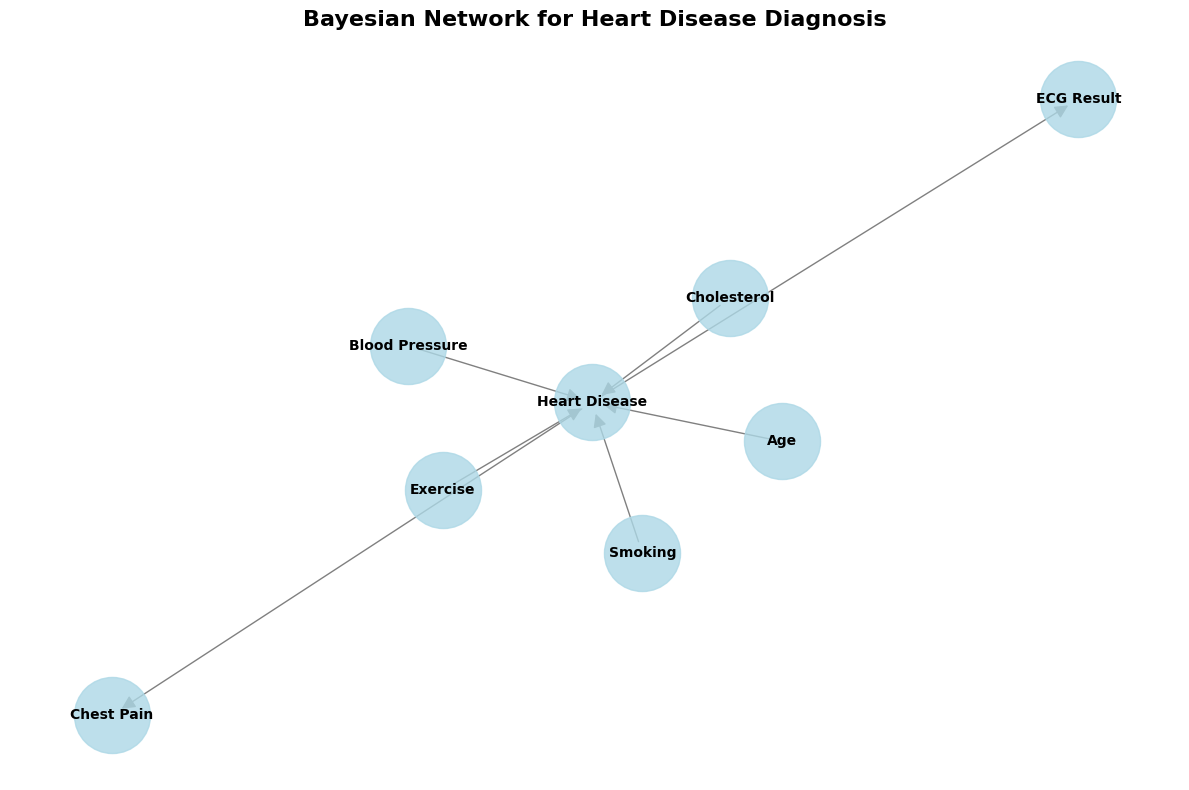

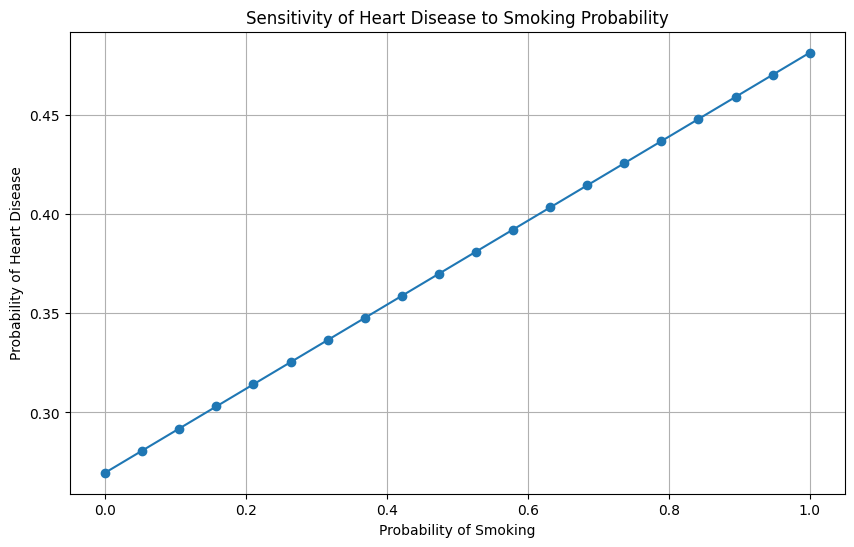

In [13]:
#@title Exercise 6: Network Visualization and Analysis

#@markdown ## 1. Visualize the Network
#@markdown In this section, we define a function to visualize the Bayesian Network using the `networkx` library. This visualization aids in understanding the structure and relationships between variables in the heart disease diagnosis model.

#@markdown ```python
#@markdown def visualize_bn(model):
#@markdown     # Create a directed graph
#@markdown     G = nx.DiGraph()
#@markdown     G.add_edges_from(model.edges())
#@markdown
#@markdown     # Set up the plot
#@markdown     plt.figure(figsize=(12, 8))
#@markdown     pos = nx.spring_layout(G)
#@markdown
#@markdown     # Draw nodes
#@markdown     nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
#@markdown     nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
#@markdown
#@markdown     # Draw edges
#@markdown     nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
#@markdown
#@markdown     # Add a title
#@markdown     plt.title("Bayesian Network for Heart Disease Diagnosis", fontsize=16, fontweight='bold')
#@markdown
#@markdown     # Remove axis
#@markdown     plt.axis('off')
#@markdown
#@markdown     # Show the plot
#@markdown     plt.tight_layout()
#@markdown     plt.show()
#@markdown
#@markdown # Visualize the Bayesian Network
#@markdown visualize_bn(model)
#@markdown ```

def visualize_bn(model):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    # Set up the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)

    # Add a title
    plt.title("Bayesian Network for Heart Disease Diagnosis", fontsize=16, fontweight='bold')

    # Remove axis
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Visualize the Bayesian Network
visualize_bn(model)

#@markdown ## 2. Sensitivity Analysis
#@markdown In this section, we perform sensitivity analysis to investigate how changes in the probability of the 'Smoking' variable impact the likelihood of 'Heart Disease'. This helps identify how sensitive our model is to this risk factor.

#@markdown ```python
#@markdown def sensitivity_analysis(model, variable, evidence, target):
#@markdown     inference = VariableElimination(model)
#@markdown     probabilities = []
#@markdown     values = np.linspace(0, 1, 20)  # Define 20 values from 0 to 1 for the probability of Smoking
#@markdown
#@markdown     for value in values:
#@markdown         # Update the CPD for the variable
#@markdown         cpd = model.get_cpds(variable)
#@markdown         new_values = np.array([[1-value], [value]])
#@markdown         new_cpd = TabularCPD(variable=variable, variable_card=2,
#@markdown                              values=new_values,
#@markdown                              state_names=cpd.state_names)
#@markdown         model.remove_cpds(cpd)  # Remove the old CPD
#@markdown         model.add_cpds(new_cpd)  # Add the updated CPD
#@markdown
#@markdown         # Perform inference
#@markdown         result = inference.query(variables=[target], evidence=evidence)
#@markdown         probabilities.append(result.values[1])  # Probability of target being True
#@markdown
#@markdown     return values, probabilities
#@markdown
#@markdown # Perform sensitivity analysis
#@markdown smoking_pr, heart_disease_pr = sensitivity_analysis(model, 'Smoking', {}, 'Heart Disease')
#@markdown ```

def sensitivity_analysis(model, variable, evidence, target):
    inference = VariableElimination(model)
    probabilities = []
    values = np.linspace(0, 1, 20)  # Define 20 values from 0 to 1 for the probability of Smoking

    for value in values:
        # Update the CPD for the variable
        cpd = model.get_cpds(variable)
        new_values = np.array([[1-value], [value]])
        new_cpd = TabularCPD(variable=variable, variable_card=2,
                             values=new_values,
                             state_names=cpd.state_names)
        model.remove_cpds(cpd)  # Remove the old CPD
        model.add_cpds(new_cpd)  # Add the updated CPD

        # Perform inference
        result = inference.query(variables=[target], evidence=evidence)
        probabilities.append(result.values[1])  # Probability of target being True

    return values, probabilities

# Perform sensitivity analysis
smoking_pr, heart_disease_pr = sensitivity_analysis(model, 'Smoking', {}, 'Heart Disease')

#@markdown ### Sensitivity Analysis Results
#@markdown We plot the results of the sensitivity analysis to illustrate the relationship between the probability of Smoking and the probability of Heart Disease.

#@markdown ```python
#@markdown plt.figure(figsize=(10, 6))
#@markdown plt.plot(smoking_pr, heart_disease_pr, marker='o')
#@markdown plt.title('Sensitivity of Heart Disease to Smoking Probability')
#@markdown plt.xlabel('Probability of Smoking')
#@markdown plt.ylabel('Probability of Heart Disease')
#@markdown plt.grid(True)
#@markdown plt.show()
#@markdown ```

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(smoking_pr, heart_disease_pr, marker='o')
plt.title('Sensitivity of Heart Disease to Smoking Probability')
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.show()

#@markdown ### Explanation:
#@markdown This exercise focuses on visualizing the Bayesian Network and performing sensitivity analysis:
#@markdown
#@markdown 1. **Network Visualization**: We use `networkx` to create a visual representation of our Bayesian Network. This helps in understanding the structure and relationships between variables in our heart disease diagnosis model.
#@markdown
#@markdown 2. **Sensitivity Analysis**: We analyze how changes in the probability of Smoking affect the likelihood of Heart Disease. This is done by:
#@markdown    - Varying the probability of Smoking from 0 to 1.
#@markdown    - For each value, updating the CPD for Smoking.
#@markdown    - Performing inference to calculate the probability of Heart Disease.
#@markdown    - Plotting the results to show the relationship between Smoking probability and Heart Disease probability.
#@markdown
#@markdown The resulting plot demonstrates how the risk of heart disease increases as the probability of smoking increases, providing insights into the sensitivity of our model to this particular risk factor.

